# Thomas & Juan attempt at logistic regression

Here we will be developing a logistic regression model to solve the classification problem of the Spotify dataset.



## Import relevant libraries 

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
#!pip install pandas-profiling==2.7.1

In [ ]:
## General packages
import pandas as pd
import numpy as np
import os
import math
from google.colab import drive
#from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split  #for splitting the data
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression #the model we're using 
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Validacion
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
drive.mount('/content/drive', force_remount= True)
#os.chdir('/content/drive/MyDrive/Asesoftware/Plan semilla/ML Challenge') #Leidy
os.chdir('/content/drive/MyDrive/ML Challenge') #Thomas
os.listdir("./")

Mounted at /content/drive


['data',
 'results',
 'Examples',
 'model.png',
 'requirements.txt',
 'Data_tree.csv',
 'Labels_tree.csv',
 'SVM.ipynb',
 'Copia de Spotify challenge.ipynb',
 'Spotify challenge.ipynb',
 'NeuralNetwork.ipynb',
 'Logistic_regression.ipynb',
 'Copy of Logistic_regression.ipynb']

In [ ]:
DATA_PATH = './data/'
RESULTS_PATH = './results/'

In [ ]:
os.listdir(DATA_PATH)

['songs_genres.csv',
 'final_data.csv',
 'Datos_no_st.csv',
 'standirezed_data.csv',
 'data_standarScaler.csv',
 'songs_genres.gsheet']

# Data preprocessing Original

In [ ]:
songs_genres = pd.read_csv(DATA_PATH+"songs_genres.csv")
df = pd.read_csv(DATA_PATH+"final_data.csv", index_col = False)

songs_genres.genre_id.unique()
songs_genres.drop_duplicates(inplace=True)
songs_genres = shuffle(songs_genres)

print(songs_genres.value_counts().sum())
songs_genres.drop_duplicates(subset=['track_id'],keep='first',inplace=True)
## TODO plot the distribution
print(songs_genres.genre_id.value_counts())
print(songs_genres.value_counts().sum())

df = df[['artist', 'artist_id', 'track_id', 'track_name', 'duration_ms', 'key','time_signature','mode_Major','mode_Minor', 'acousticness', 'instrumentalness', 'liveness',
       'loudness', 'tempo', 'speechiness', 'valence', 'modulation','singability', 'chillness', 'danceability', 'energy', 'popularity']]
df = df.merge(songs_genres, on='track_id').drop(['modulation','chillness'],axis=1)

227294
7.0     9676
25.0    9050
10.0    8733
3.0     8728
21.0    8707
6.0     8595
26.0    8450
23.0    8435
14.0    8227
20.0    8219
16.0    8092
4.0     7955
15.0    7633
8.0     7428
11.0    6347
24.0    6339
18.0    5042
9.0     5019
13.0    4795
12.0    4768
22.0    4518
2.0     4351
17.0    4310
19.0    4195
5.0     3635
1.0      119
Name: genre_id, dtype: int64
171366


In [ ]:
songs_genres

,track_id,genre_id
429734,7mIn6sL3Q4jN4dUFmw4soV,15.0
301685,5AO2fQQ3mdlU3wf3NO8vWn,3.0
349492,3hKgkdMIzn5rAvm5KzCPvv,18.0
263758,0XfOV7qY3834QpFVwOb6CC,17.0
232521,2AobDJxjDp5TbxGdR3JGen,19.0
...,...,...
421499,0wciosqywmCzqNfg6jdUHC,16.0
188483,1uJ3q5icJB4Cj8YyydmeEH,7.0
182914,1k6cCIaUri8fWTTgxQLsiD,7.0
424959,5Yb8GQdQu2GJOtZoGKN7Vw,16.0


In [ ]:
feature_correlation = df.corr()
feature_correlation.style.background_gradient(cmap='coolwarm')

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
artist_id,1.000000,-0.008049,0.007832,0.002759,-0.077418,-0.011900,-0.028523,0.064371,0.030681,-0.043545,0.050191,-0.027812,0.027823,0.059230,0.039833,-0.001847
duration_ms,-0.008049,1.000000,-0.007466,-0.002240,0.024407,0.069009,0.016501,-0.048721,-0.027412,-0.013198,-0.129746,0.106397,-0.106401,-0.045724,-0.022998,-0.035695
mode_Major,0.007832,-0.007466,1.000000,-0.424276,0.002169,-0.052173,-0.002130,0.009244,0.012571,-0.022972,-0.002589,0.021019,-0.021025,-0.010488,0.050389,-0.020051
mode_Minor,0.002759,-0.002240,-0.424276,1.000000,-0.055745,0.025352,-0.025762,0.032454,-0.001078,0.010175,0.009101,-0.062918,0.062931,0.036754,0.089900,0.015954
acousticness,-0.077418,0.024407,0.002169,-0.055745,1.000000,0.309651,0.086098,-0.696575,-0.267401,0.176694,-0.370210,0.401265,-0.401266,-0.729403,-0.356298,-0.044194
instrumentalness,-0.011900,0.069009,-0.052173,0.025352,0.309651,1.000000,-0.164502,-0.506710,-0.110900,-0.193683,-0.338012,0.377970,-0.377974,-0.401677,-0.165201,0.044384
liveness,-0.028523,0.016501,-0.002130,-0.025762,0.086098,-0.164502,1.000000,0.055456,-0.061028,0.562108,0.014048,0.018190,-0.018185,0.207966,-0.190780,-0.133335
loudness,0.064371,-0.048721,0.009244,0.032454,-0.696575,-0.506710,0.055456,1.000000,0.250003,0.002809,0.439979,-0.475886,0.475889,0.825249,0.328561,-0.024260
tempo,0.030681,-0.027412,0.012571,-0.001078,-0.267401,-0.110900,-0.061028,0.250003,1.000000,-0.102992,0.156593,-0.047647,0.047657,0.247242,0.096841,-0.005514
speechiness,-0.043545,-0.013198,-0.022972,0.010175,0.176694,-0.193683,0.562108,0.002809,-0.102992,1.000000,0.023131,-0.136282,0.136279,0.167052,-0.177383,-0.186992


In [ ]:
df[df['instrumentalness']>1]

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
94763,The Arrogant Sons Of Bitches,12396.0,6luidVWKHWkZDmChOiKCXh,Melon Country,155200,E,4/4,1,0,0.123,5.0,0.346,-1.721,100.215,0.209,0.69,0.547,0.453,0.987,14.0,23.0


In [ ]:
## Normalizar: [0,1] x/max(x), Estandarizar media=0 y varianza=1, formula = (x-mean)/std
## Remove negatives, normalize/estandarizar
## Negatives: loudness, chillness, popularity
##MAX(normalize) : duration_ms, artist_id, instrumentalness, loudness, tempo, popularity
df=df[df['instrumentalness']<1]

In [ ]:
# SCALE THE DATA
df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']] = MinMaxScaler().fit_transform(df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']])
df.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,14.163697
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,7.379041
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,1.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,7.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,14.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,21.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,26.000000


In [ ]:
df2 = pd.get_dummies(df.drop(['genre_id','artist','track_id','track_name'],axis=1))
df2.head(3)

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,1.0,0.038205,0,1,0.10800,0.001281,0.1590,0.286033,0.090019,0.0391,0.866,0.291,0.709,0.831,0.736774,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,9.0,0.053122,1,0,0.01220,0.000000,0.2600,0.305562,0.139583,0.0930,0.517,0.424,0.576,0.967,0.661290,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,9.0,0.040700,1,0,0.00219,0.000003,0.0799,0.291169,0.079250,0.0647,0.454,0.334,0.666,0.793,0.632258,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df2.to_csv(DATA_PATH+"standirezed_data.csv",index=False)

In [ ]:
df2.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,0.099227,0.067598,0.074052,0.116657,0.097027,0.104531,0.033542,0.075873,0.087480,0.065527,0.114615,0.063870,0.000035,0.013299,0.116803,0.844507,0.025355
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,0.298967,0.251056,0.261857,0.321013,0.295995,0.305949,0.180049,0.264796,0.282538,0.247454,0.318558,0.244521,0.005917,0.114553,0.321187,0.362375,0.157202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df2
y = df['genre_id']
X_train, X_test, y_train, y_test = train_test_split( X, y,\
                          test_size=0.2,random_state=1234, stratify = y)

print('X_train shape= ', X_train.shape)
print('X_test shape= ', X_test.shape)
print('y_train shape= ', y_train.shape)
print('y_test shape= ', y_test.shape)

X_train shape=  (137092, 32)
X_test shape=  (34273, 32)
y_train shape=  (137092,)
y_test shape=  (34273,)


In [ ]:
y.head()
X_train.head()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
33773,5054.0,0.050844,0,1,0.0111,0.205205,0.1120,0.275780,0.057483,0.0402,0.326,0.395,0.605,0.419,0.748387,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
136672,10844.0,0.042433,1,0,0.8950,0.000000,0.0959,0.279455,0.142422,0.0349,0.283,0.338,0.662,0.290,0.658065,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
34347,11687.0,0.043363,0,1,0.4520,0.185185,0.1540,0.278307,0.114088,0.0407,0.388,0.258,0.742,0.417,0.700000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145422,10765.0,0.008933,1,0,0.9920,0.900901,0.1160,0.199051,0.053025,0.0371,0.696,0.692,0.308,0.170,0.445161,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
722,1011.0,0.047560,1,0,0.3740,0.139139,0.2250,0.292530,0.117821,0.0357,0.477,0.427,0.573,0.767,0.662366,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
# How many songs in the training set have 4/4 time signature?

X_train.value_counts()

artist_id  duration_ms  mode_Major  mode_Minor  acousticness  instrumentalness  liveness  loudness  tempo     speechiness  valence  singability  danceability  energy  popularity  key_A  key_A#  key_B  key_C  key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  time_signature_0/4  time_signature_1/4  time_signature_3/4  time_signature_4/4  time_signature_5/4
6306.0     0.035142     1           0           0.94900       0.827828          0.110     0.250256  0.128193  0.0412       0.501    0.609        0.391         0.340   0.593548    0      0       0      0      0       1      0       0      0      0       0      0       0                   0                   0                   1                   0                     2
10933.0    0.034357     1           0           0.00295       0.000048          0.525     0.294512  0.138336  0.0669       0.763    0.338        0.662         0.844   0.703226    0      0       0      0      0       0      0       0      0      0       0      1

In [ ]:
df.head()

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
0,!!!,1.0,2UjEyfnKzaY7qpBEeESJjv,Even When The Water's Cold,0.038205,D,4/4,0,1,0.10800,0.001281,0.1590,0.286033,0.090019,0.0391,0.866,0.291,0.709,0.831,0.736774,22.0
1,(Hed) P.E.,9.0,40F6hDk7Z7PJNua8SSErJH,Raise Hell,0.053122,D,4/4,1,0,0.01220,0.000000,0.2600,0.305562,0.139583,0.0930,0.517,0.424,0.576,0.967,0.661290,5.0
2,(Hed) P.E.,9.0,5yrGsJoG4FsTg6luHlNGK2,Bartender,0.040700,F#,4/4,1,0,0.00219,0.000003,0.0799,0.291169,0.079250,0.0647,0.454,0.334,0.666,0.793,0.632258,2.0
3,(Sandy) Alex G,10.0,2wYM37q07tyVSWMZvlgghS,Hope,0.025482,F#,4/4,0,0,0.32900,0.469469,0.1180,0.294938,0.082753,0.0260,0.414,0.447,0.553,0.596,0.677419,2.0
4,(Sandy) Alex G,10.0,3NzLIbvq342cvzDlDH33RV,Sarah (Bonus Track),0.029010,E,4/4,0,0,0.51400,0.000188,0.1380,0.296375,0.113012,0.0314,0.497,0.350,0.650,0.686,0.661290,2.0


# Building our model

In [ ]:
#Define our model

#I would like to build a linear logistic regression model for many classes
# multi_class = 'ovo' or multinomial suggest = One class (7000) Vs Other class (95), ovr = One class vs Rest. genre = 7: 7700 observations vs 130.000 obervations
# class_weight = 'balanced'
# random_state = number 
#


model = LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga', max_iter= 300,class_weight = 'balanced',random_state =1234)
model.fit(X_train, y_train)


## gridsearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=1234, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
# Test our data

#score = round(model.score(X_test, y_test)*100,2)

#print(score)


pred = model.predict(X_test)
print('----------Model report on all classes ----------')
print(classification_report(y_test,pred))

----------Reporte para el Mejor Modelo X----------
              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00        24
         2.0       0.00      0.00      0.00       869
         3.0       0.00      0.00      0.00      1748
         4.0       0.00      0.00      0.00      1598
         5.0       0.33      0.00      0.00       719
         6.0       0.16      0.01      0.02      1723
         7.0       0.60      0.07      0.13      1936
         8.0       0.11      0.00      0.00      1484
         9.0       0.00      0.00      0.00      1012
        10.0       0.67      0.01      0.01      1745
        11.0       0.14      0.00      0.00      1283
        12.0       0.00      0.00      0.00       977
        13.0       0.00      0.00      0.00       956
        14.0       0.23      0.00      0.01      1644
        15.0       0.07      0.00      0.00      1525
        16.0       0.54      0.00      0.01      1617
        17.0       0.03      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Analysis of this result

In [ ]:
# For more advanced model, we can build a polynomial model 
#see: https://stackoverflow.com/questions/55937244/how-to-implement-polynomial-logistic-regression-in-scikit-learn

#We will have xi, xi^2, xixj features

In [ ]:

#Let's have a more detailed look at how the probabilities are predicted 
yhat_prob = model.predict_proba(X_test)

For the first example, the correct genre is 8.0


Text(0, 0.5, 'Classification probability')

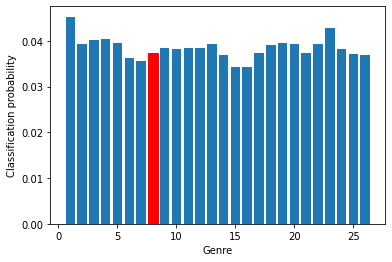

In [ ]:
#Let's take a look at how our model classifies the first test example

x = np.linspace(1,26,26)
print('For the first example, the correct genre is {}'.format(y_test.iloc[0]))

barlist = plt.bar(x,yhat_prob[1])
barlist[int(y_test.iloc[0] -1 )].set_color('r')

plt.xlabel('Genre')
plt.ylabel('Classification probability')

In [ ]:
#Grid search to optimise hyperparameters 

#pipe = Pipeline([('clf')])
param_grid_original = [ #A dictionary containing all the HP options
  {'penalty': ['l1','l2,','elasticnet', ' none'], #type of regularization, l1 is lasso, l2 is ridge, elasticnet is both
    'C': np.logspace(-4,4,20),  #inverse of regularization strength (i.e. 1 /lambda)
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'] # differnt solvers
#'max_iter' : [100,1000,2500,5000] #if more iterations are needed
  }

]


#pipe = Pipeline([('clf')])
param_grid = [ #A dictionary containing all the HP options
  {'penalty': ['l1','l2','elasticnet'], #type of regularization, l1 is lasso, l2 is ridge, elasticnet is both
    'C': np.logspace(-2,2,4),  #inverse of regularization strength (i.e. 1 /lambda)
    'solver' : ['lbfgs','newton-cg','sag','saga'] # differnt solvers
#'max_iter' : [100,1000,2500,5000] #if more iterations are needed
  }

]

clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose = True, n_jobs=1)

#model is our logreg model
#paramter grid as defined above
#cv = 3 means 3 Cv folds
# verbose gives us updates as the gridsearch is working
#njobs = -1??

In [ ]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 pe

In [ ]:
#Let's see which model had the best results
optimal_lr_model = best_clf.best_estimator_
print(optimal_lr_model)

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=1234, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)


In [ ]:
# Check accuracy (on the training set)

pred = optimal_lr_model.predict(X_test)
print('----------Model report on all classes ----------')
print(classification_report(y_test,pred))

#print(f'Accuracy-: {best_clf.score(X_train,y_train):.3f}')

----------Model report on all classes ----------
              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00        24
         2.0       0.00      0.00      0.00       869
         3.0       0.00      0.00      0.00      1748
         4.0       0.00      0.00      0.00      1598
         5.0       0.33      0.00      0.00       719
         6.0       0.16      0.01      0.02      1723
         7.0       0.60      0.07      0.13      1936
         8.0       0.11      0.00      0.00      1484
         9.0       0.00      0.00      0.00      1012
        10.0       0.62      0.01      0.01      1745
        11.0       0.14      0.00      0.00      1283
        12.0       0.00      0.00      0.00       977
        13.0       0.00      0.00      0.00       956
        14.0       0.23      0.00      0.01      1644
        15.0       0.07      0.00      0.00      1525
        16.0       0.54      0.00      0.01      1617
        17.0       0.03      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Run this after using PCA to reduce the dimensionality of the data

#y_test.value_counts()

X_test.head()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
136894,11338.0,0.035183,0,0,0.45000,0.000000,0.3830,0.295854,0.157033,0.0557,0.924,0.428,0.572,0.843,0.625806,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
29027,5674.0,0.037273,0,0,0.28900,0.022122,0.0632,0.277360,0.111360,0.0357,0.607,0.336,0.664,0.348,0.690323,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
110181,12304.0,0.061850,0,0,0.03210,0.529530,0.1300,0.294305,0.112054,0.0358,0.761,0.594,0.406,0.786,0.561290,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
91834,8375.0,0.025155,1,0,0.00206,0.001121,0.0638,0.299485,0.077707,0.0450,0.522,0.482,0.518,0.906,0.529032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
170395,10687.0,0.020861,1,0,0.49800,0.000000,0.2580,0.256038,0.081152,0.0456,0.711,0.268,0.732,0.359,0.380645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Load in standardised data



In [ ]:
 #Load in data from our standardised dataset
 
 df_standard =  pd.read_csv(DATA_PATH+"data_standarScaler.csv", index_col = False)

df_standard.head()

,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,-0.091793,-0.813750,1.917981,-0.792380,-0.530771,-0.316995,0.501562,-0.385179,-0.431252,1.586923,-0.913303,0.913296,0.973498,1.302597,-0.699497,-0.3319,-0.269257,-0.282798,-0.363406,-0.3278,2.926861,-0.186297,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
1,0.539778,1.228879,-0.521382,-1.053930,-0.534728,0.157929,0.983437,0.920062,-0.168942,0.272894,-0.210638,0.210632,1.465799,0.603169,-1.648762,-0.3319,-0.269257,-0.282798,-0.363406,-0.3278,2.926861,-0.186297,-0.286535,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
2,0.013823,1.228879,-0.521382,-1.081259,-0.534717,-0.688939,0.628298,-0.668798,-0.306667,0.035691,-0.686125,0.686119,0.835943,0.334158,-1.648762,-0.3319,-0.269257,-0.282798,-0.363406,-0.3278,-0.341663,-0.186297,-0.286535,-0.309623,3.776365,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
3,-0.630487,-0.813750,-0.521382,-0.189012,0.915155,-0.509785,0.721299,-0.576536,-0.495004,-0.114914,-0.089125,0.089119,0.122831,0.752619,-1.648762,-0.3319,-0.269257,-0.282798,-0.363406,-0.3278,-0.341663,-0.186297,-0.286535,-0.309623,3.776365,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
4,-0.481135,-0.813750,-0.521382,0.316070,-0.534147,-0.415741,0.756736,0.220325,-0.468725,0.197591,-0.601594,0.601588,0.448618,0.603169,-1.241934,-0.3319,-0.269257,-0.282798,-0.363406,-0.3278,-0.341663,-0.186297,3.489971,-0.309623,-0.264805,-0.359795,-0.261203,-0.005917,-0.116096,-0.363663,0.429095,-0.161291
